In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 274s 24us/step


In [4]:
X_train.shape

(60000, 28, 28)

**we have sixty thousand images with 28X28**

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
%matplotlib inline

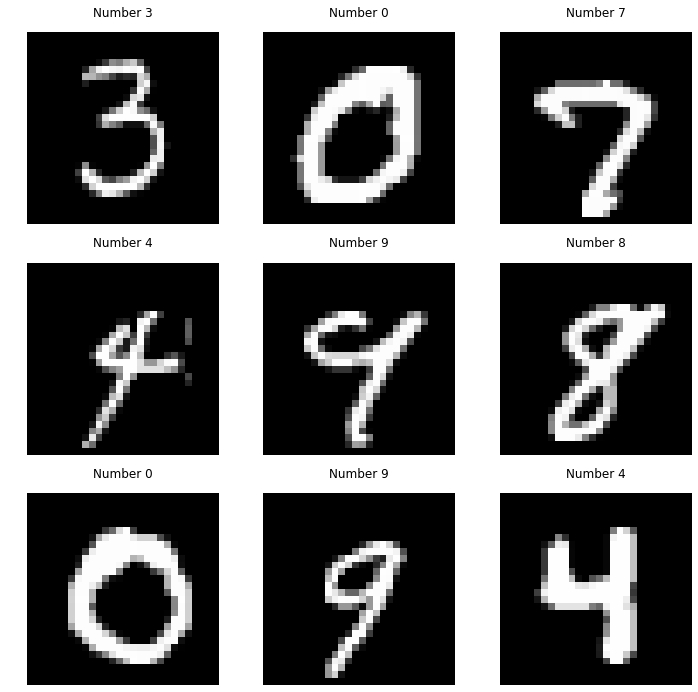

In [12]:
fig, ax=plt.subplots(3,3,figsize=(12,12))
plt.gray()

for i,a in enumerate(ax.flat):
    a.matshow(X_train[50+i])
    a.axis('off')
    a.set_title(f'Number {y_train[50+i]}')

fig.show()

## Preprocessing

In [13]:
# convert each image into 1D

X=X_train.reshape(len(X_train),-1)
Y=y_train

In [14]:
X=X.astype(float)/255

print(X.shape)
print(X[0].shape)

(60000, 784)
(784,)


In [16]:
from sklearn.cluster import MiniBatchKMeans

n_digits=len(np.unique(y_test))
print(n_digits)

kmeans=MiniBatchKMeans(n_clusters=n_digits)

kmeans.fit(X)

10


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=10,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [19]:
kmeans.labels_

array([7, 0, 1, ..., 7, 6, 2], dtype=int32)

In [20]:
def infer_cluster_labels(kmeans,acutal_labels):
    inferred_labels={}
    
    for i in range(kmeans.n_clusters):
        labels=[]
        index=np.where(kmeans.labels_==i)
        
        labels.append(acutal_labels[index])
        
        #determine most common label
        if len(labels[0])==1:
            counts=np.bincount(np.squeeze(labels))
        else:
            counts=np.bincount(np.squeeze(labels))
            
        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)]=[i]
    return inferred_labels


def infer_data_labels(X_labels,cluster_labels):
    predicted_labels=np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i]=key
    return predicted_labels

In [21]:
# testing

cluster_labels=infer_cluster_labels(kmeans,Y)
X_clusters=kmeans.predict(X)
predicted_labels=infer_data_labels(X_clusters,cluster_labels)

print(predicted_labels[:20])
print(Y[:20])

[8 0 4 1 7 2 1 8 1 7 8 1 3 6 1 7 2 8 6 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


## Evaluating the cluster

In [22]:
from sklearn import metrics

In [25]:
def calculate_metrics(estimator, data, labels):
    print(f'Number of clusters: {estimator.n_clusters}')
    print(f'Inertia: {estimator.inertia_}')
    print(f'Homogeneity: {metrics.homogeneity_score(labels, estimator.labels_)}')

In [28]:
clusters=[300,350,400]

#test different number of clusters
for n_clusters in clusters:
    estimator=MiniBatchKMeans(n_clusters=n_clusters)
    estimator.fit(X)
    
    calculate_metrics(estimator,X,Y)
    
    cluster_labels=infer_cluster_labels(estimator,Y)
    predicted_Y=infer_data_labels(estimator.labels_,cluster_labels)
    
    
    print(f'Accuracy {metrics.accuracy_score(Y,predicted_Y)}')

Number of clusters: 300
Inertia: 1488833.090448914
Homogeneity: 0.8478729242021371
Accuracy 0.8979833333333334


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=350. Setting it to 3*k
  init_size=init_size)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=350. Setting it to 3*k
  init_size=init_size)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Number of clusters: 350
Inertia: 1460109.1296646604
Homogeneity: 0.8562023961582463
Accuracy 0.9041666666666667


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=400. Setting it to 3*k
  init_size=init_size)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=400. Setting it to 3*k
  init_size=init_size)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=400. Setting it to 3*k
  init_size=init_size)


Number of clusters: 400
Inertia: 1427272.3752339026
Homogeneity: 0.8617928962337387
Accuracy 0.9064666666666666


In [29]:
X_test=X_test.reshape(len(X_test),-1)
X_test=X_test.astype(float)/255

kmeans=MiniBatchKMeans(n_clusters=256)
kmeans.fit(X)

cluster_labels=infer_cluster_labels(kmeans,Y)

test_clusters=kmeans.predict(X_test)
predicted_labels=infer_data_labels(test_clusters,cluster_labels)

#calculate and acc
print(f"testing Acc: {metrics.accuracy_score(y_test,predicted_labels)}")

testing Acc: 0.9052


# Visualize cluster centroids

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


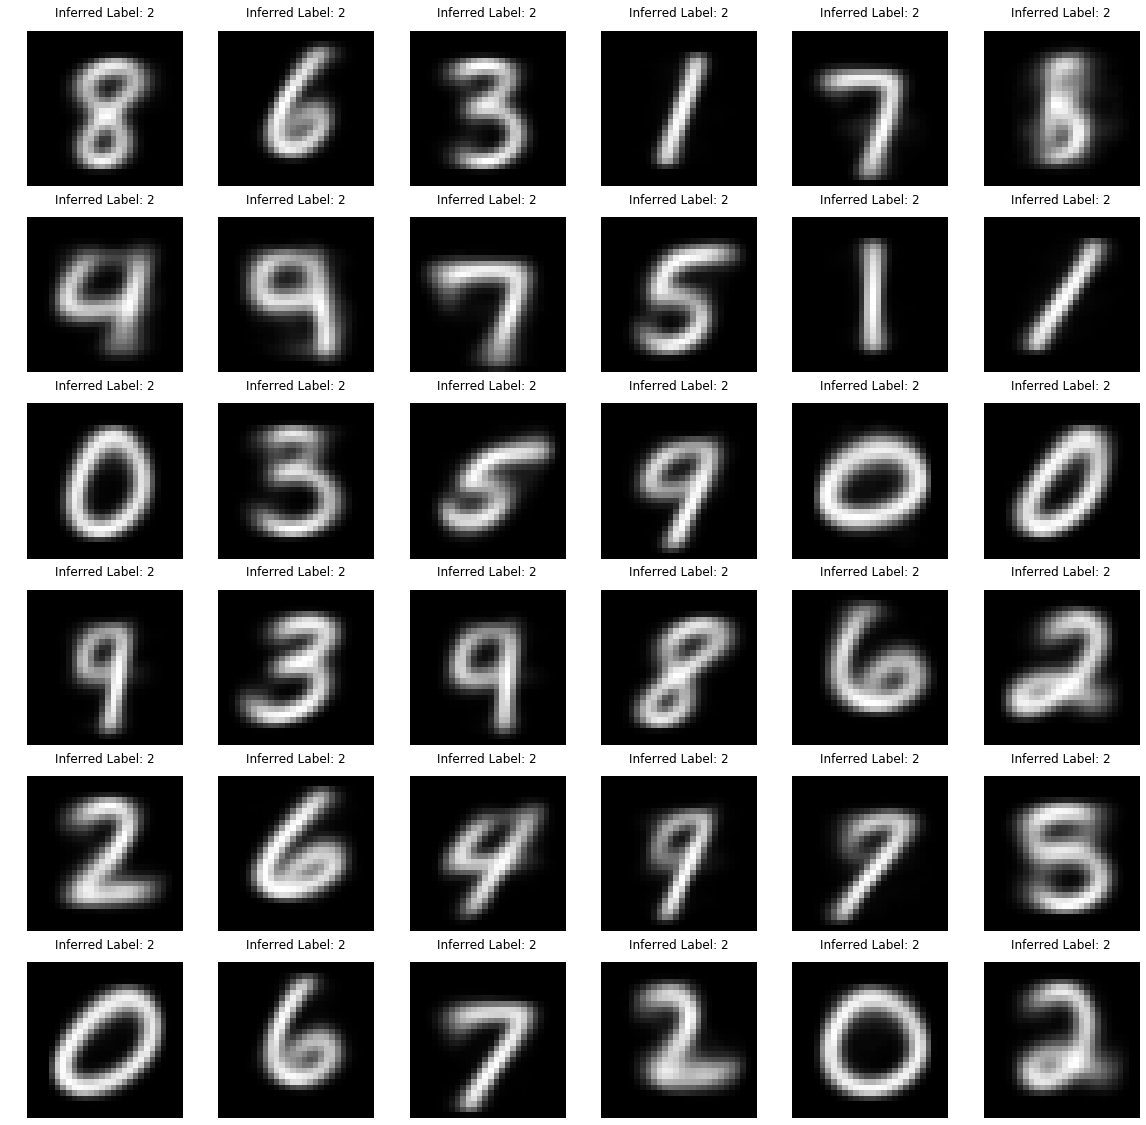

In [32]:
kmeans=MiniBatchKMeans(n_clusters=36)
kmeans.fit(X)

centroids=kmeans.cluster_centers_

images=centroids.reshape(36,28,28)
images*=255
images=images.astype(np.uint8)


cluster_labels=infer_cluster_labels(kmeans,Y)


fig,axs=plt.subplots(6,6,figsize=(20,20))
plt.gray()

for i,ax in enumerate(axs.flat):
    for key,value in cluster_labels.items():
        ax.set_title(f'Inferred Label: {key}')
        
    ax.matshow(images[i])
    ax.axis('off')

fig.show()